## IMD0033 - Probabilidade

# Trabalho I 

Este trabalho servirá como avaliação dos conteúdos relacionados a Estatística Descritiva.

Data de entrega: Até 12:00 do dia 14/09

Forma de entrega: Via SIGAA na forma de um jupyter notebook ou na forma de um documento em um editor de texto.

### Questão 1

Defina com suas palavras e de forma sucinta os termos abaixo:

a) População

Respota: Corresponde ao conjunto de TODOS os indivíduos que possuam a característica de interesse para a pesquisa ou estudo.

b) Amostra

Respota: É o subconjunto da população.

c) Conceito (em um desenho experimental)

Resposta: Objeto ideal, ou abstrato na qual deseja-se estudar. Exemplo: Memória.

d) Definição operacional

Resposta: Metodologia utilizada para quantificar ou medir o conceito. Exemplo: Teste de QI para "medir" a memória.

e) Experimento controlado

Resposta: Experimento utilizado para comprovar se uma determinada variável é a causa do fenômeno em estudo. Normalmente, as amostras são subdivididas em dois grupos: o grupo experimental, que recebe a ação da variável, e o grupo controle, que não recebe a ação da variável.

f) Desvio

Resposta: Diferença entre o valor de uma amostra com a média.

g) Correção de Bessel

Resposta: Correção utilizada para estimar a variância ou o desvio padrão de uma população a partir de uma amostra.

h) Outlier

Resposta: Uma amostra que possui um valor extremo em relação às outras amostras.

### Questão 2

Reflita sobre as seguintes afirmações, indique se é verdadeiro ou falso e justifique:

a) Se a média de um conjunto de dados é 50, podemos certamente afirmar que os dados encontram-se próximos de 50.

Resposta: Falso, podemos encontrar por exemplo um conjunto de dados que seja {0,100}. Os dois valores não são próximos de 50, mas a sua média é 50. Para determinar que os dados estão próximos da média é necessário utilizar alguma medida de dispersão.

b) A variância é a média dos desvios ao quadrado.

Resposta: Verdadeiro, podemos dizer também que a variância é a média do quadrado dos desvios.

c) Quando transformamos os dados através do z-score, a mediana dos dados transformados é sempre 0.

Resposta: Falso, quando transformamos os dados através do z-score, é a média que se torna 0. A mediana, como também a moda, será também 0 apenas se eles tiverem os mesmos valores que a média.

d) Ao analisar a correlação entre duas variáveis, se verificarmos uma correlação de 0.9, o que é considerada alta, podemos certamente afirmar que a variável dependente é a causa da variação nos valores da variável independente.

Resposta: Falso, apesar da correlação alta, a correlação não necessariamente denota a causa do fenômeno. Lembre-se do exemplo da teoria dos arcos dourados. Para testar a causa do fenômeno, é necessário realizar um experimento controlado.

### Questão 3

Baixe o arquivo que se encontram neste [link](). Este arquivo contém dados de emissão de CO2 em kT (quilotonelada) emitido pelos países ao longo no período de 2000 a 2014. Desconsiderando aqueles países que apresentam valores faltantes (".."), responda:

a) Qual foi o país que menos emitiu CO2 ao longo destes anos?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def medArit (listNum):
    lenList = len(listNum)
    soma = 0
    for i in listNum:
        soma += i
    return soma/lenList

def sd (listNum):
    media = medArit(listNum)
    somaDesvioQ = 0;
    for i in listNum:
        somaDesvioQ += (i - media)**2
    desvio = (somaDesvioQ/len(listNum))**0.5
    return desvio

def cov(numList1, numList2):
    media1 = medArit(numList1)
    media2 = medArit(numList2)
    n = float(len(numList1))
    produtoDesvio = 0
    for i in range(len(numList1)):
        produtoDesvio += (numList1[i] - media1)*(numList2[i] - media2)
    return produtoDesvio/n

def corr(numList1, numList2):
    covar = cov(numList1, numList2)
    sd1 = sd(numList1)
    sd2 = sd(numList2)
    return covar/(sd1*sd2)

def zTran(numList):
    media1 = medArit(numList)
    sd1 = sd(numList)
    for i in range(len(numList)):
        numList[i] = (numList[i]-media1)/sd1
    return numList

In [15]:
# Leitura do arquivo
f = open("CO2_emission.txt","r")

header = f.readline().rstrip()

line = f.readline()
country = {}
while line:
    cells = line.split("\t")
    if (not cells[0]):
        break
    country[cells[2]] = []
    for i in range(4,len(cells)):
        if (cells[i] == '..'):
            del country[cells[2]]
            break
        country[cells[2]].append(float(cells[i]))
    if cells[2] in country:
        country[cells[2]] = np.array(country[cells[2]])
    line = f.readline().rstrip()
f.close()

In [7]:
# Somando os dados
sumCo2 = []
countryName = []
for i in country.keys():
    sumCo2.append(country[i].sum())
    countryName.append(i)
    
# Verificando o menor valor da soma
sumCo2 = np.array(sumCo2)
sortedIndex = sumCo2.argsort()
print(countryName[sortedIndex[0]])
print(country[countryName[sortedIndex[0]]])

Tuvalu
[ 7.334  7.334 11.001 11.001 11.001 11.001  7.334 11.001 11.001 11.001
  7.334  7.334 11.001 11.001 11.001]


b) Qual foi o país que teve a maior média da taxa de emissão de CO2 ao longo destes anos?

In [17]:
# A taxa média de cada país deve ser calculada utilizando a média geométrica.
# Calculando a taxa média de cada país:
taxCo2= []
for i in country.keys():
    taxCountry = 1
    for j in range(1,len(country[i])):
        taxCountry *= country[i][j]/country[i][j-1]
    taxCo2.append(taxCountry**(1/(len(country[i])-1)))
taxCo2 = np.array(taxCo2)
sortedIndex = taxCo2.argsort()
print(countryName[sortedIndex[-1]])
print(taxCo2[sortedIndex[-1]])

Afghanistan
1.1989157527600298


c) Quantos países conseguiram diminuir a emissão de CO2 durante este período? Em outras palavras, quantos países tiveram sua taxa média de emissão de CO2 menor que 1?

In [18]:
print(len(taxCo2[taxCo2<1]))

42


d) Qual é a taxa média de emissão de CO2 do Brasil ao longo destes anos?

In [20]:
taxCountry = 1
for j in range(1,len(country["Brazil"])):
    taxCountry *= country["Brazil"][j]/country["Brazil"][j-1]
taxBrazil = (taxCountry**(1/(len(country["Brazil"])-1)))
print(taxBrazil)

1.0348470342467841


e) A taxa média de emissão de CO2 entre os países segue aproximadamente uma distribuição normal como mostra o gráfico abaixo. Dos países que estamos analisando, quantos deles possuem a taxa média maior que a taxa média brasileira? 

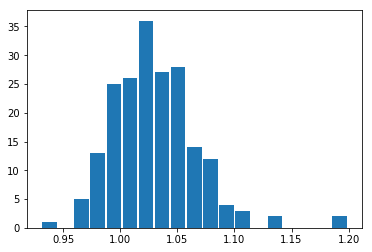

In [21]:
bins = np.linspace(taxCo2.min(),taxCo2.max(),20)
plt.hist(taxCo2, bins, rwidth=0.9)
plt.show()

In [11]:
print(len(taxCo2[taxCo2>taxBrazil]))

79


f) A Noruega é um dos países que vem fazendo esforço para diminuir a emissão de CO2. Abaixo se encontra o gráfico que demonstra a quantidade de CO2 emitido por este país ao longo do período apresentado pelos dados. Tendo em mente este padrão de emissão de CO2 da Noruega, qual o país que possui um padrão de emissão de CO2 mais similar ao padrão da Noruega? Plote um gráfico que consiga demonstrar a semelhança dos padrões de emissão de CO2 entre os dois países.

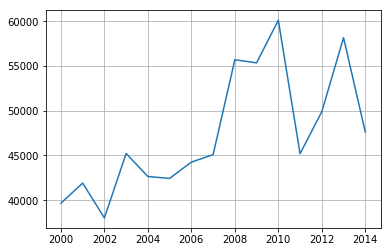

In [12]:
years = range(2000,2015)
plt.plot(years, country["Norway"])
plt.grid()
plt.show()

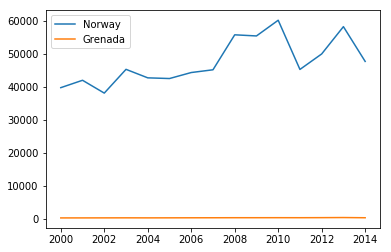

In [13]:
# para encontrar um país que tenha um padrão similar a Noruega, deve-se realizar 
# a correlação de Pearson entre os dados de Noruega com os demais países.

compCountry = "Norway"
corrFin = []
countryName = []
for i in country.keys():
    corrFin.append(corr(country[compCountry], country[i]))
    countryName.append(i)
corrFin = np.array(corrFin)
sortedIndex = corrFin.argsort()

plt.plot(years, country[compCountry], label=compCountry)
plt.plot(years, country[countryName[sortedIndex[-2]]], label=countryName[sortedIndex[-2]])
plt.legend()
plt.show()

# Nesta análise podemos verificar que Grenada é o que possui a correlação mais alta com os dados de Noruega.

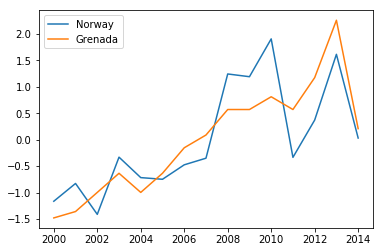

In [14]:
# No entanto, ao plotar os dois gráficos de forma direta, não é possível verificar claramente
# que os dois possuam um padrão similar. Isso se deve ao problema de escala dos valores.
# Para comparar os padrões, podemos plotar os dados transformados pelo z-score de 
# Noruega e Grenada.

plt.plot(years, zTran(country[compCountry]), label=compCountry)
plt.plot(years, zTran(country[countryName[sortedIndex[-2]]]), label=countryName[sortedIndex[-2]])
plt.legend()
plt.show()